<p style="color:#F6F6F6;background-color:#31B8EA;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> ⭐ TPS AUGUST: EDA+NULLS+LGBMImpute+XGBoost ⭐ <span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

<center><img src="https://i.postimg.cc/Df5FQcYw/Kaggle.png" 
             style='border-radius:10px'></center>

<a id="1"></a> 
# <b>1 <span style='color:#31B8EA'>|</span> Importing Libraries</b>

In [ ]:
!git clone https://github.com/analokmaus/kuma_utils.git
sys.path.append("kuma_utils/")

In [235]:
import os
import sys
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sns 
import plotly.express as px

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from kuma_utils.preprocessing.imputer import LGBMImputer

from sklearn import metrics
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix , precision_recall_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

import colorama
from colorama import Fore, Style
warnings.simplefilter(action='ignore')
print(Fore.BLUE + "All Libraries Imported Successfully!")

All Libraries Imported Successfully!


In [236]:
plt.style.use('fivethirtyeight')
print(Fore.BLUE + "All Styles Set!")

All Styles Set!


<a id="2"></a> 
# <b>2 <span style='color:#31B8EA'>|</span> Setting Colors</b>

### CREDITS: https://www.kaggle.com/andradaolteanu 

In [89]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'

In [98]:
my_colors = ["#10002b","#240046","#3c096c","#5a189a","#7b2cbf","#9d4edd","#c77dff","#e0aaff"]
CMAP1 = ListedColormap(my_colors)

In [96]:
my_colors_1 = ["#001219","#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]

CMAP2 = ListedColormap(my_colors_1)

Notebook Color Scheme ONE:


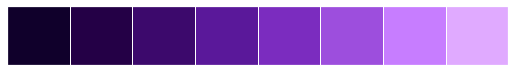

In [102]:
print(clr.S+"Notebook Color Scheme ONE:"+clr.S)
sns.palplot(sns.color_palette(my_colors))
plt.show()

Notebook Color Scheme Two:


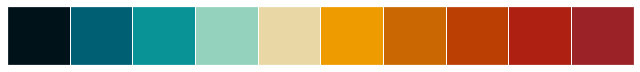

In [97]:
print(clr.S+"Notebook Color Scheme Two:"+clr.S)
sns.palplot(sns.color_palette(my_colors_1))
plt.show()

<a id="3"></a> 
# <b>3 <span style='color:#31B8EA'>|</span> LOADING DATA</b>

In [2]:
data_train = pd.read_csv("../input/tabular-playground-series-aug-2022/train.csv", index_col=0)
data_test = pd.read_csv("../input/tabular-playground-series-aug-2022/test.csv", index_col=0)
sample_submission = pd.read_csv("../input/tabular-playground-series-aug-2022/sample_submission.csv")

<a id="4"></a> 
# <b>4 <span style='color:#31B8EA'>|</span> Explore</b>

In [38]:
print(Fore.GREEN + "data_train Shape is", data_train.shape)
print(Fore.GREEN + "data_test Shape is", data_test.shape)
print(Fore.GREEN + "sample_submission Shape is", sample_submission.shape)

data_train Shape is (26570, 25)
data_test Shape is (20775, 24)
sample_submission Shape is (20775, 2)


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [10]:
pd.options.display.max_columns = 100
data_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [115]:
print('Zero is', round(data_train['failure'].value_counts()[0]/len(data_train) * 100,2), '% of the failure class!')
print('One is', round(data_train['failure'].value_counts()[1]/len(data_train) * 100,2), '% of the failure class!')

Zero is 78.74 % of the failure class!
One is 21.26 % of the failure class!


In [21]:
data_train.describe().style.background_gradient(cmap='Spectral')

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


<a id="5"></a> 
# <b>5 <span style='color:#31B8EA'>|</span> Explore Nulls for Test & Train</b>

<AxesSubplot:ylabel='id'>

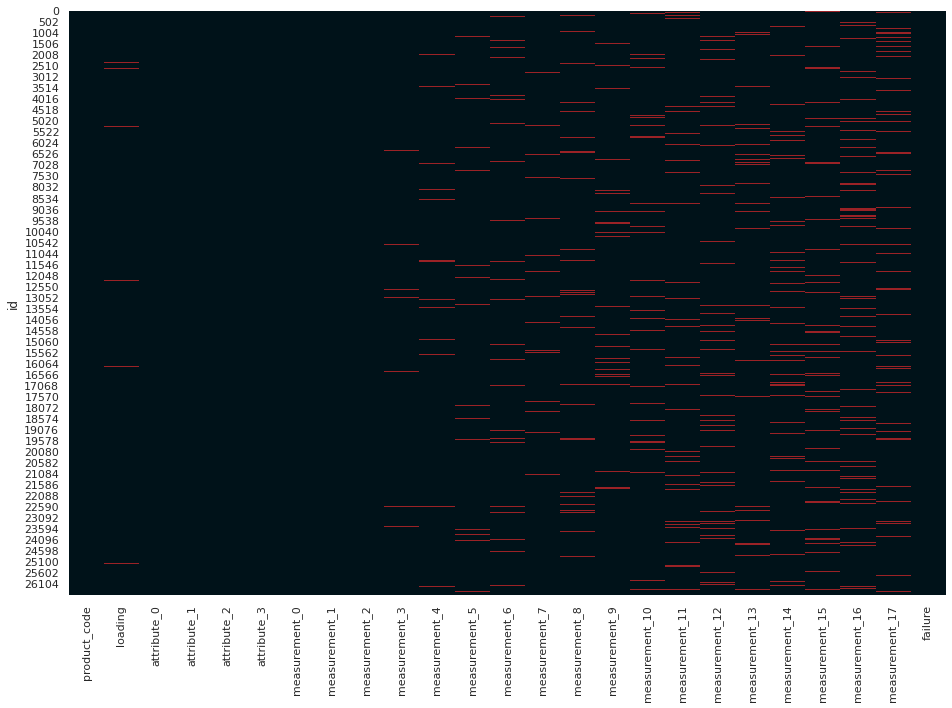

In [111]:
# Plot to see null values in our train data
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data_train.isnull(), cbar=False, cmap=CMAP2)

In [73]:
# Null Value Percentage Per column
percent_missing = data_train.isnull().sum() * 100 / len(data_train)
missing_value_df = pd.DataFrame({'column_name': data_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False).style.background_gradient(cmap='Spectral')

,column_name,percent_missing
measurement_17,measurement_17,8.596161
measurement_16,measurement_16,7.941287
measurement_15,measurement_15,7.561159
measurement_14,measurement_14,7.053067
measurement_13,measurement_13,6.676703
measurement_12,measurement_12,6.025593
measurement_11,measurement_11,5.525028
measurement_10,measurement_10,4.892736
measurement_9,measurement_9,4.617990
measurement_8,measurement_8,3.944298


<AxesSubplot:>

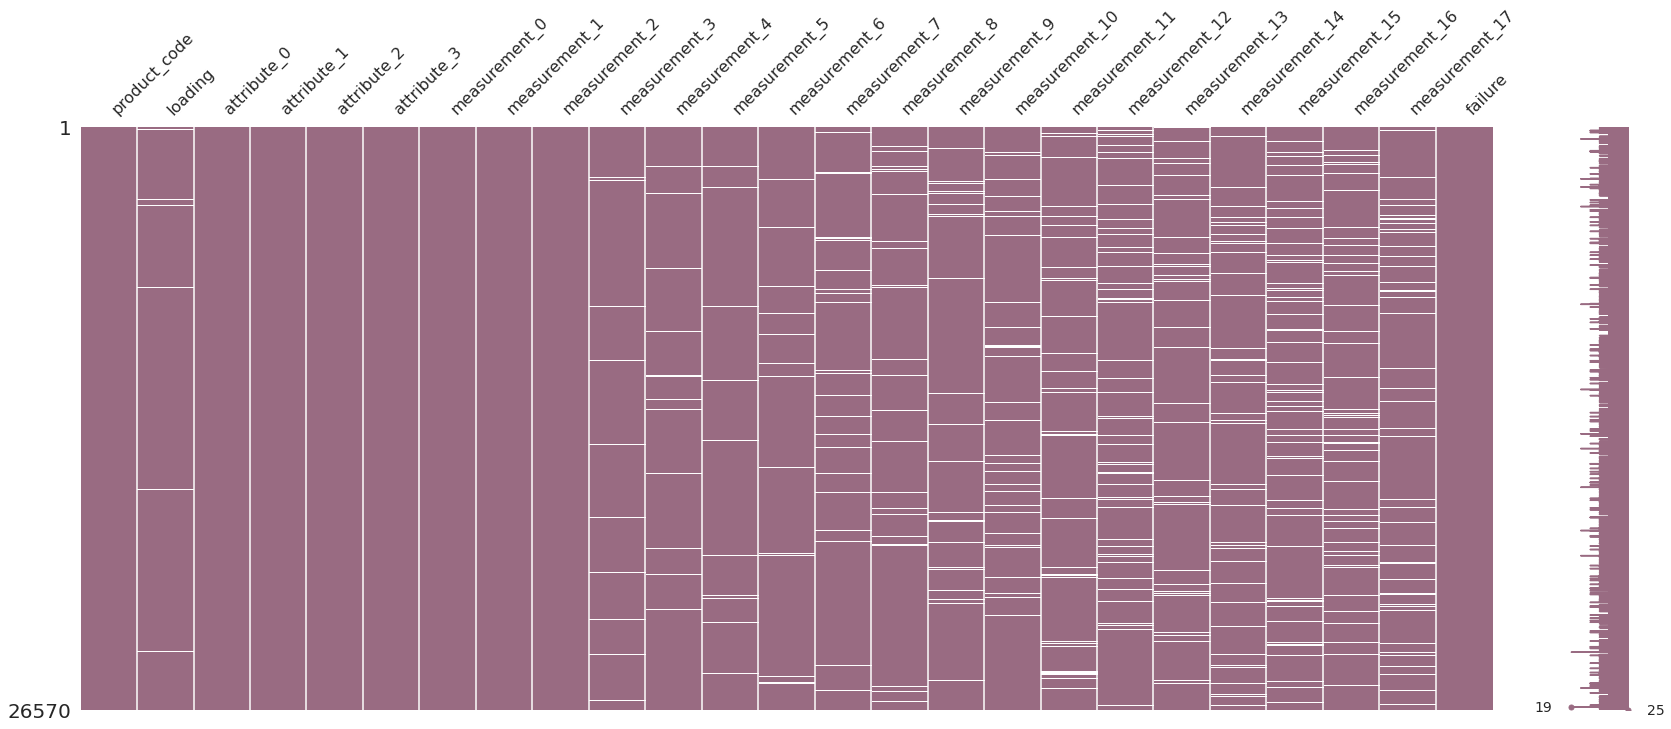

In [83]:
msno.matrix(data_train, color=(0.60, 0.42, 0.51))

<AxesSubplot:ylabel='id'>

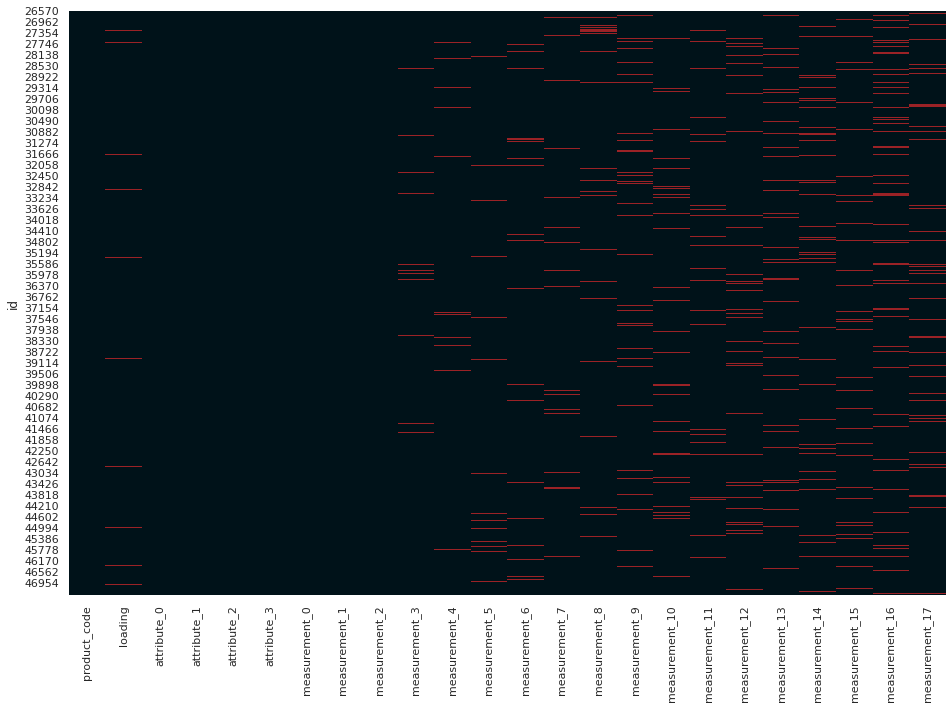

In [108]:
# Plot to see null values in our test data
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data_test.isnull(), cbar=False, cmap=CMAP2)

In [76]:
# Null Value Percentage Per column
percent_missing_ts = data_test.isnull().sum() * 100 / len(data_test)
missing_value_df_ts = pd.DataFrame({'column_name': data_test.columns,
                                 'percent_missing': percent_missing_ts})
missing_value_df_ts.sort_values('percent_missing', ascending=False).style.background_gradient(cmap='Spectral')

,column_name,percent_missing
measurement_17,measurement_17,8.375451
measurement_16,measurement_16,8.077016
measurement_15,measurement_15,7.422383
measurement_14,measurement_14,6.931408
measurement_13,measurement_13,6.271961
measurement_12,measurement_12,5.968712
measurement_11,measurement_11,5.468111
measurement_10,measurement_10,5.135981
measurement_9,measurement_9,4.351384
measurement_8,measurement_8,4.072202


<AxesSubplot:>

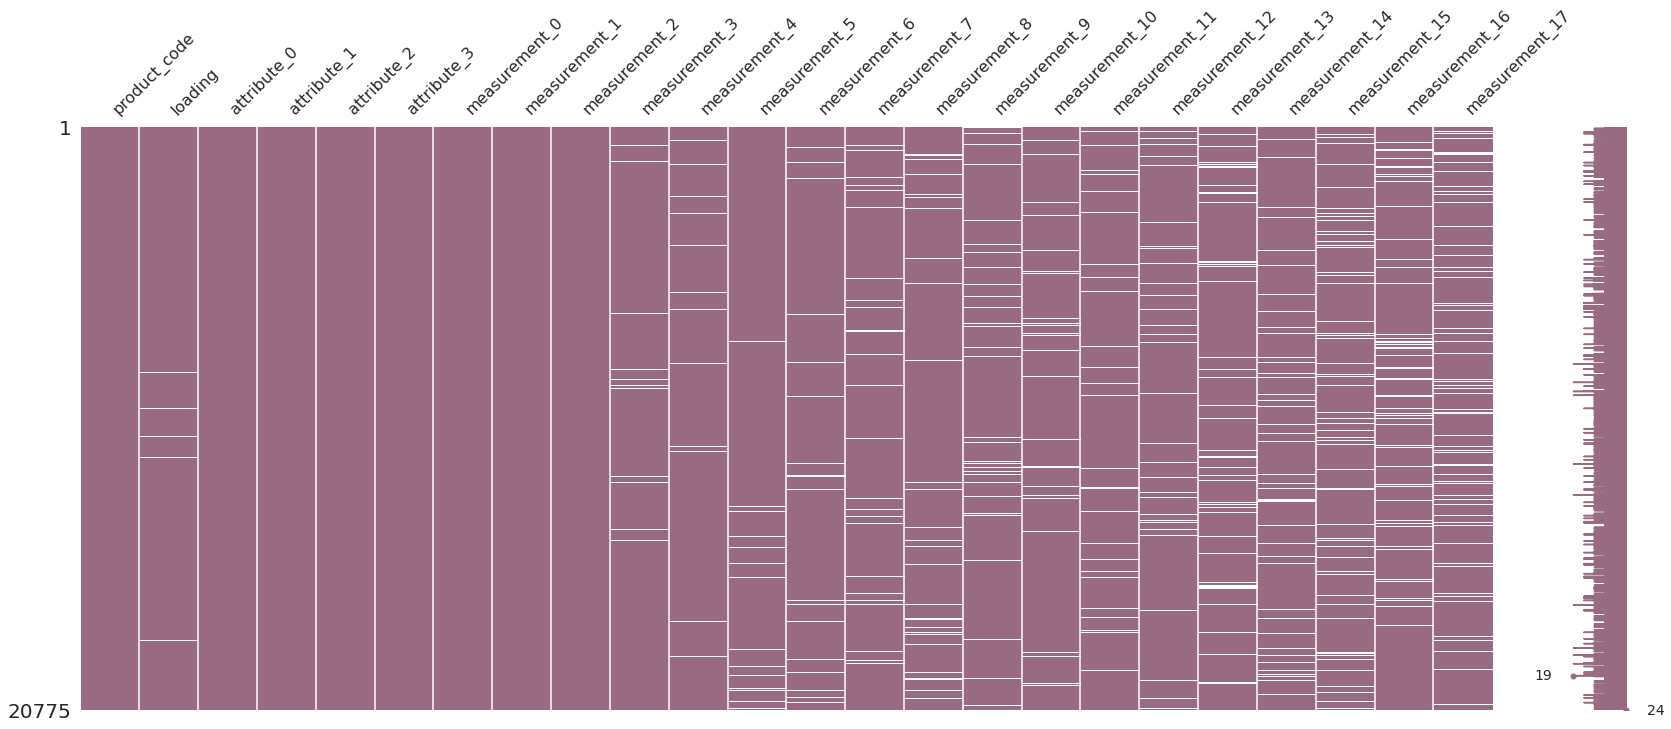

In [82]:
msno.matrix(data_test, color=(0.60, 0.42, 0.51))

### (1) What we can see from above analysis is that the percentage of null values in test data as well as the train dataset is quite similar.

### (2) Only Float Columns have Missing Values.

<a id="6"></a> 
# <b>6 <span style='color:#31B8EA'>|</span> Correlation Heatmap</b>

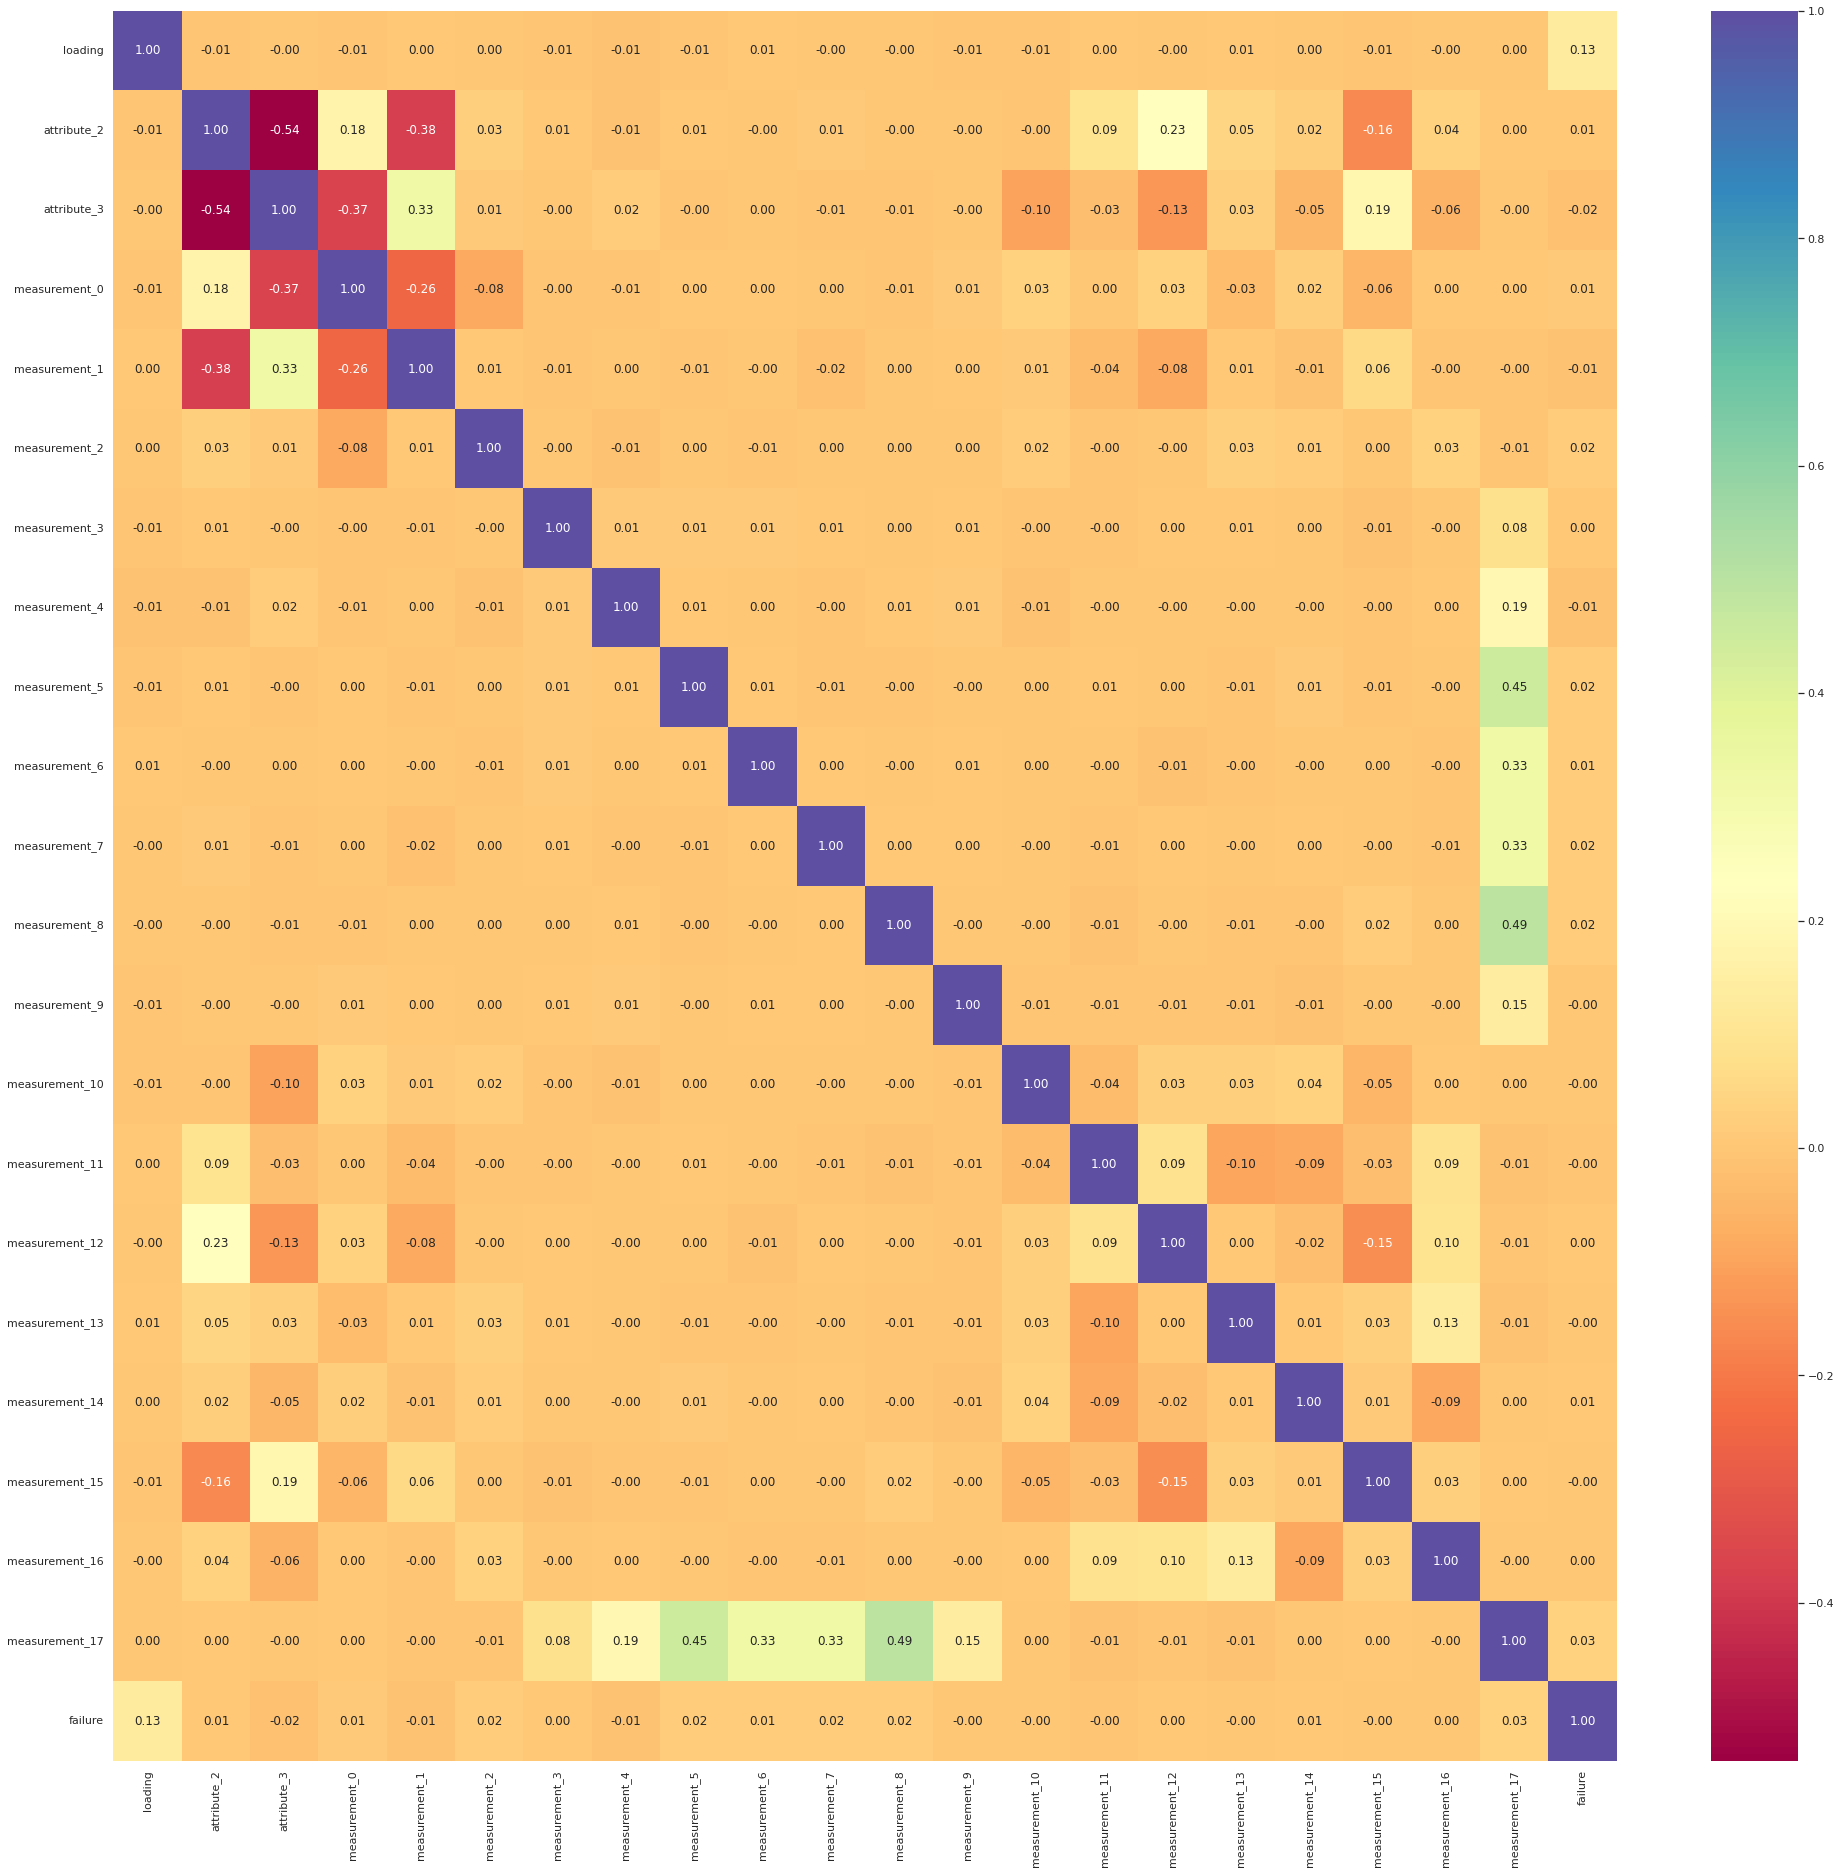

In [112]:
plt.figure(figsize=(30,30))
cor = data_train.corr()
sns.heatmap(cor, annot=True, cmap='Spectral', fmt='.2f')
plt.show()

<a id="7"></a> 
# <b>7 <span style='color:#31B8EA'>|</span> Taking Care of Missing Values</b>

## Credits 
### [Ambrosm's Notebook](https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense)
### [Desalegngeb's Notebook](https://www.kaggle.com/code/desalegngeb/tps08-logisticregression-and-some-fe)
All four attributes are directly related with product code their value is determined by product code column so we can impute the missing values using the same group data.

In [132]:
data_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [133]:
target = data_train.pop('failure')

In [134]:
data_train['product_code'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [135]:
data_test['product_code'].unique()

array(['F', 'G', 'H', 'I'], dtype=object)

In [124]:
df_A = data_train[data_train['product_code']=='A']
df_B = data_train[data_train['product_code']=='B']
df_C = data_train[data_train['product_code']=='C']
df_D = data_train[data_train['product_code']=='D']
df_E = data_train[data_train['product_code']=='E']
print(Fore.GREEN + "Train Data Done!")
df_F_t = data_test[data_test['product_code']=='F']
df_G_t = data_test[data_test['product_code']=='G']
df_H_t = data_test[data_test['product_code']=='H']
df_I_t = data_test[data_test['product_code']=='I']
print(Fore.GREEN + "Test Data Done!")

Train Data Done!
Test Data Done!


In [126]:
object_cols = [col for col in data_train.columns if data_train[col].dtypes == 'object']
nullValue_cols = [col for col in data_train.columns if data_train[col].isnull().sum()!=0]

In [127]:
lgbm_imtr = LGBMImputer(cat_features=object_cols, n_iter=50)

# train dataset
train_iterimp_A = lgbm_imtr.fit_transform(df_A[nullValue_cols])
train_iterimp_B = lgbm_imtr.fit_transform(df_B[nullValue_cols])
train_iterimp_C = lgbm_imtr.fit_transform(df_C[nullValue_cols])
train_iterimp_D = lgbm_imtr.fit_transform(df_D[nullValue_cols])
train_iterimp_E = lgbm_imtr.fit_transform(df_E[nullValue_cols])

# test dataset
test_iterimp_F = lgbm_imtr.fit_transform(df_F_t[nullValue_cols])
test_iterimp_G = lgbm_imtr.fit_transform(df_G_t[nullValue_cols])
test_iterimp_H = lgbm_imtr.fit_transform(df_H_t[nullValue_cols])
test_iterimp_I = lgbm_imtr.fit_transform(df_I_t[nullValue_cols])


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [180]:
none_na_cols = [col for col in data_train.columns if col not in nullValue_cols]
none_na_cols_ = [col for col in data_test.columns if col not in nullValue_cols]
df_train = data_train[none_na_cols]
df_test = data_test[none_na_cols_]

train_ = pd.concat([train_iterimp_A, train_iterimp_B,train_iterimp_C,train_iterimp_D,train_iterimp_E], axis=0)
train = pd.concat([df_train, train_], axis=1)

test_ = pd.concat([test_iterimp_F, test_iterimp_G,test_iterimp_H,test_iterimp_I], axis=0)
test = pd.concat([df_test, test_], axis=1)

In [181]:
print(Fore.GREEN + "Missing values in train dataset after pre-peocessing is: ", format(train.isna().sum().sum()))

Missing values in train dataset after pre-peocessing is:  0


In [182]:
print(Fore.GREEN + "Missing values in test dataset after pre-peocessing is: ", format(test.isna().sum().sum()))

Missing values in test dataset after pre-peocessing is:  0


In [183]:
display(train['attribute_2'].unique())
display(train['attribute_3'].unique())
print()
print()
display(train['measurement_0'].unique())
display(train['measurement_1'].unique())
display(train['measurement_2'].unique())

array([9, 8, 5, 6])

array([5, 8, 6, 9])

array([ 7, 14, 12, 13,  9, 11,  4, 10,  6,  8, 21, 15, 17, 18, 19, 16,  5,
       25,  3,  1, 23, 20, 22,  2, 26, 24,  0, 29, 27])

array([ 8,  3,  1,  2,  4,  6,  0,  9,  5,  7, 10, 12, 11, 13, 17, 14, 16,
       15, 18, 20, 24, 22, 21, 19, 23, 27, 25, 26, 29, 28])

array([ 4,  3,  5,  6,  8,  0,  7,  2, 10,  9, 15, 12, 11,  1, 13, 16, 14,
       19, 17, 18, 20, 21, 23, 24, 22])

In [184]:
train['attribute_2*3'] = train['attribute_2'] * train['attribute_3']
test['attribute_2*3'] = test['attribute_2'] * test['attribute_3']

In [185]:
meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17))]
train['meas_gr1_avg'] = np.mean(train[meas_gr1_cols], axis=1)
train['meas_gr1_std'] = np.std(train[meas_gr1_cols], axis=1)

test['meas_gr1_avg'] = np.mean(test[meas_gr1_cols], axis=1)
test['meas_gr1_std'] = np.std(test[meas_gr1_cols], axis=1) 

meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9))]
train['meas_gr2_avg'] = np.mean(train[meas_gr2_cols], axis=1)
test['meas_gr2_avg'] = np.mean(test[meas_gr2_cols], axis=1)

In [186]:
train['meas17/meas_gr2_avg'] = train['measurement_17'] / train['meas_gr2_avg']
test['meas17/meas_gr2_avg'] = test['measurement_17'] / test['meas_gr2_avg']

In [189]:
cols_to_use = ['measurement_0', 'measurement_1', 'measurement_2', 'attribute_0', 'attribute_1', 
               'meas_gr1_avg', 'meas_gr1_std', 'attribute_2*3', 'loading', 'measurement_17', 'meas17/meas_gr2_avg']

In [190]:
train = train[cols_to_use]
test = test[cols_to_use]

In [193]:
display(train['attribute_0'].unique())
display(test['attribute_0'].unique())

array(['material_7', 'material_5'], dtype=object)

array(['material_5', 'material_7'], dtype=object)

In [194]:
display(train['attribute_1'].unique())
display(test['attribute_1'].unique())

array(['material_8', 'material_5', 'material_6'], dtype=object)

array(['material_6', 'material_7', 'material_5'], dtype=object)

In [195]:
combined_data = pd.concat([train,test],axis = 0)

In [197]:
combined_data.head(5)

,measurement_0,measurement_1,measurement_2,attribute_0,attribute_1,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
id,,,,,,,,,,,
0,7,8,4,material_7,material_8,14.689010,2.125402,45,80.10,764.100,45.662892
1,14,3,3,material_7,material_8,15.000100,2.398674,45,84.89,682.057,41.182665
2,12,1,5,material_7,material_8,15.821853,2.500122,45,82.43,663.376,40.214355
3,13,2,6,material_7,material_8,14.983500,2.657732,45,101.07,826.282,48.209224
4,9,2,8,material_7,material_8,15.058200,3.031408,45,188.06,579.885,37.330651


In [198]:
label_encoder = preprocessing.LabelEncoder() 
combined_data['attribute_0'] = label_encoder.fit_transform(combined_data['attribute_0'])
combined_data['attribute_1'] = label_encoder.fit_transform(combined_data['attribute_1'])

In [201]:
combined_data.head(5)

,measurement_0,measurement_1,measurement_2,attribute_0,attribute_1,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
id,,,,,,,,,,,
0,7,8,4,1,3,14.689010,2.125402,45,80.10,764.100,45.662892
1,14,3,3,1,3,15.000100,2.398674,45,84.89,682.057,41.182665
2,12,1,5,1,3,15.821853,2.500122,45,82.43,663.376,40.214355
3,13,2,6,1,3,14.983500,2.657732,45,101.07,826.282,48.209224
4,9,2,8,1,3,15.058200,3.031408,45,188.06,579.885,37.330651


In [204]:
train = combined_data[combined_data.index<=26569]
test = combined_data[combined_data.index>=26570]

In [210]:
train.head(5).style.background_gradient(cmap='Spectral')

,measurement_0,measurement_1,measurement_2,attribute_0,attribute_1,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
id,,,,,,,,,,,
0,7,8,4,1,3,14.689010,2.125402,45,80.100000,764.100000,45.662892
1,14,3,3,1,3,15.000100,2.398674,45,84.890000,682.057000,41.182665
2,12,1,5,1,3,15.821853,2.500122,45,82.430000,663.376000,40.214355
3,13,2,6,1,3,14.983500,2.657732,45,101.070000,826.282000,48.209224
4,9,2,8,1,3,15.058200,3.031408,45,188.060000,579.885000,37.330651


In [211]:
test.head(5).style.background_gradient(cmap='Spectral')

,measurement_0,measurement_1,measurement_2,attribute_0,attribute_1,meas_gr1_avg,meas_gr1_std,attribute_2*3,loading,measurement_17,meas17/meas_gr2_avg
id,,,,,,,,,,,
26570,6,9,6,0,1,14.997200,2.919290,24,119.570000,634.612000,38.488158
26571,11,8,0,0,1,14.913758,2.267607,24,113.510000,537.037000,33.665810
26572,8,12,4,0,1,14.892400,2.863233,24,112.160000,658.995000,40.736540
26573,8,11,10,0,1,14.435600,2.486692,24,112.720000,594.301000,37.064471
26574,14,16,8,0,1,14.996600,2.185226,24,208.000000,801.044000,48.501090


In [212]:
display(train['attribute_0'].unique())
display(train['attribute_1'].unique())

array([1, 0])

array([3, 0, 1])

In [213]:
display(test['attribute_0'].unique())
display(test['attribute_1'].unique())

array([0, 1])

array([1, 2, 0])

In [214]:
print(Fore.GREEN + "train Shape is", train.shape)
print(Fore.GREEN + "test Shape is", test.shape)
print(Fore.GREEN + "target Shape is", target.shape)

train Shape is (26570, 11)
test Shape is (20775, 11)
target Shape is (26570,)


<a id="8"></a> 
# <b>8 <span style='color:#31B8EA'>|</span> XGBoost with GridSearchCV</b>

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring = 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(train, target)       

In [229]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(train, target)

In [244]:
# Predictions on the train set
train_pred = xgb_imb_model.predict(train)

In [246]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(target, train_pred))

# F1 score
print("F1-Score:-", f1_score(target, train_pred))

Accuracy:- 0.8197214904027098
F1-Score:- 0.2684789248625534


In [247]:
# classification_report
print(classification_report(target, train_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     20921
           1       0.98      0.16      0.27      5649

    accuracy                           0.82     26570
   macro avg       0.90      0.58      0.58     26570
weighted avg       0.85      0.82      0.76     26570



In [248]:
test_pred = xgb_imb_model.predict(test)

In [251]:
sample_submission.failure = test_pred

In [252]:
sample_submission

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,1
...,...,...
20770,47340,0
20771,47341,0
20772,47342,0
20773,47343,0


In [253]:
sample_submission['failure'].value_counts()

0    20428
1      347
Name: failure, dtype: int64

In [255]:
sample_submission.to_csv("submission_first.csv", index=False)

### Disclamer: This Notebook is a Work in progress!

### 🍇 I'm Hungry Now 🍇

<center><img src="https://images.unsplash.com/photo-1527598041828-aea5d622f3a8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80" 
             style='border-radius:10px'></center>

<p style="color:#F6F6F6;background-color:#25AAE1;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> If you Like this Notebook please Upvote and also give your kind suggestions in Comments!<span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>